# Machine Learning: Ground Water Survey

This report is a part of **Machine Learning For All** Slack group. 

Source of data: http://college.cengage.com/mathematics/brase/understandable_statistics/8e/students/datasets/slr/slr09.html

### Importing Necessary Libraries  

In [471]:
import numpy as np
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

### Reading Data

In [472]:
data_org=pd.read_csv('slr09.csv')

### Exploring our data. 

X = pH of well water,
Y = Bicarbonate (parts per million) of well water

In [473]:
data_org.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


### Spliting our data for training and testing

Separating out pH and Bicarbonate values.

In [474]:
ph=data_org.iloc[:,:-1].values
bicarb=data_org.iloc[:,1].values

### Plot of Original Data

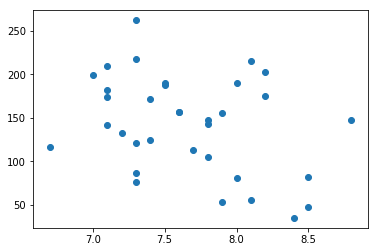

In [475]:
plt.scatter(ph,bicarb)

### Using Linear Regression to fit line through our data.

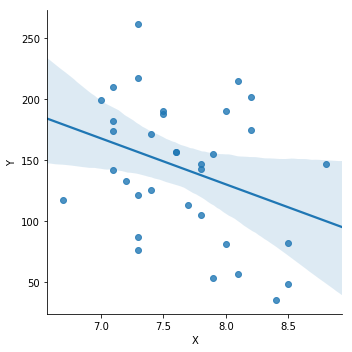

In [476]:
sbs.lmplot("X","Y",data_org)

We will be using 30% of our data for testing and 70% for training. 

In [477]:
from sklearn.model_selection import train_test_split
ph_train,ph_test,bicarb_train,bicarb_test=train_test_split(ph,bicarb,test_size=0.3,random_state=10)

Training our model. We will be using Linear Regression model from scikit-learn library. 

**Training will be done with our ph_train & bicarb_train training sets.

**ph_test & bicarb_test will be kept aside for testing our model.

In [478]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(ph_train,bicarb_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now lets use our model (lr) to predict Bicarbonate values. Our model (lr) haven't seen these "ph_test" values. We had kept it aside in the beginning for testing purpose.

In [488]:
ph_test

array([[7.2],
       [7.9],
       [8.2],
       [8. ],
       [7.8],
       [7.5],
       [7.3],
       [7.3],
       [8.5],
       [7.8],
       [7.1]])

In [479]:
prediction=lr.predict(ph_test)

In [480]:
prediction

array([155.09994459, 134.41944868, 125.556379  , 131.46509212,
       137.37380524, 146.23687491, 152.14558803, 152.14558803,
       116.69330932, 137.37380524, 158.05430115])

Below is our original values of Bicarbonate.

In [481]:
bicarb_test[:]

array([133,  53, 175, 190, 143, 188, 262, 121,  48, 105, 174], dtype=int64)

# Conclusion:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


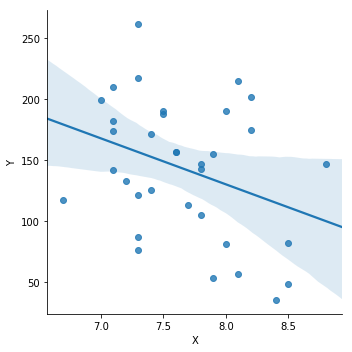

In [482]:
sbs.lmplot("X","Y",data_org)

As you can see our learning model tried its best to fit a line through the data. But due to scattered values and less training data it is quite inefficient.